In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [170]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance

import pandas as pd

from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy. stats import boxcox 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib.colors import ListedColormap
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error as mape

### Область работы 2 (поиск  модели .... )

In [12]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train_house_B.csv' # содержит только имя файла, без имен папок !!!

In [17]:
train=pd.read_csv(path_train)
test=pd.read_csv('test_house_B.csv')

In [98]:
train

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3360000,-0.091662,0.593876,-0.087882,-2.465344,0.077307,0.151482,1.452151,1.772175,-1.264971,...,-0.141322,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063,1.307431
404,5950000,-1.406286,0.179794,0.640850,0.405623,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,...,-0.141322,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063,-0.478408
405,3675000,-0.091662,1.099966,0.225750,-2.465344,-0.716123,-0.534316,-0.090348,1.151380,1.631097,...,-0.141322,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063,1.307431
406,7455000,1.222962,1.498909,-0.392289,0.405623,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,...,-0.141322,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063,-0.478408


In [15]:
train.isna().sum()

price    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
dtype: int64

In [16]:
train.describe()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
count,4.080000e+02,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,...,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,4.737224e+06,0.021112,-0.003301,-0.011893,0.018605,0.028544,0.038168,-0.023595,-0.001552,-0.006136,...,0.007289,-0.051018,0.014040,-0.013599,-0.064105,-0.034111,0.037765,-0.040639,0.001248,-0.040703
std,1.865673e+06,0.992535,0.998581,0.977707,0.981679,0.998079,0.956908,1.018189,1.005549,0.992948,...,1.013391,0.967405,0.991954,1.017292,0.935958,1.005660,1.005871,0.997217,1.001723,0.967634
min,1.750000e+06,-1.406286,-1.790865,-1.591469,-2.465344,-3.986188,-5.413279,-1.837623,-1.648222,-1.771244,...,-3.418780,-0.554035,-2.665004,-0.570187,-1.369020,-0.805741,-0.929397,-1.657159,-0.679063,-4.050087
25%,3.430000e+06,-0.091662,-0.901293,-0.701308,0.405623,-0.126718,-0.024866,-0.868979,-0.865484,-0.840225,...,-0.141322,-0.554035,0.047278,-0.570187,-0.694949,-0.805741,-0.929397,-0.925067,-0.679063,-0.478408
50%,4.329500e+06,-0.091662,0.002391,-0.272371,0.405623,-0.126718,-0.024866,-0.011371,-0.027759,-0.014453,...,-0.141322,-0.554035,0.047278,-0.570187,-0.242940,-0.805741,0.224410,-0.106249,-0.679063,-0.478408
75%,5.740000e+06,1.222962,0.909385,0.504098,0.405623,0.058888,0.311665,0.882608,0.847563,0.816233,...,-0.141322,-0.554035,0.047278,1.421812,0.379395,0.355976,0.224410,0.814362,1.472618,-0.478408
max,1.330000e+07,1.222962,1.665706,5.096263,0.405623,13.021551,4.246676,1.670364,1.790334,1.777808,...,9.691053,1.804941,4.115701,5.405809,5.162983,2.679409,2.532024,1.741964,1.472618,3.093270


In [88]:
feature_names = train.drop('price',axis=1).columns


In [112]:
X_train, X_test,y_train, y_test = train_test_split(train.drop('price',axis=1), train.price,train_size=0.7)

In [186]:
rf=RandomForestRegressor(n_jobs=-1)
rf.fit(X_train,y_train)
mape(y_test,rf.predict(X_test))

0.19983547872005336

In [185]:
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
mape(y_test,gb.predict(X_test))

0.1992255457345455

In [184]:
rg=Ridge()
rg.fit(X_train,y_train)
mape(y_test,rg.predict(X_test))

0.1757963159339342

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

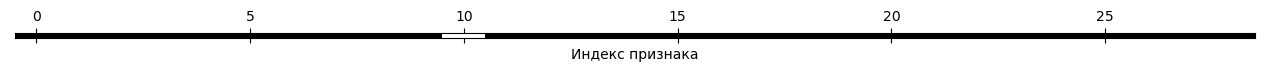

In [113]:
th = 0.8
transform_threshold = VarianceThreshold(threshold=(th * (1 - th)))
transform_threshold.fit_transform(X_train)
mask = transform_threshold.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.1);
plt.yticks([])
plt.xlabel("Индекс признака")
transform_threshold.get_support()

In [110]:
X_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28'],
      dtype='object')

In [114]:
X_train_new=X_train.drop('10',axis=1)
X_test_new=X_test.drop('10',axis=1)

In [38]:
X_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28'],
      dtype='object')

In [115]:
rg=Ridge()
rg.fit(X_train_new,y_train)
mape(y_test,rg.predict(X_test_new))

0.18359753317798802

In [116]:
cv_scores = cross_val_score(rg, X_test_new, y_test, cv=10,scoring='neg_mean_absolute_percentage_error' )
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV Precision = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -0.1339
	-0.1987
	-0.2084
	-0.2118
	-0.2648
	-0.1366
	-0.1143
	-0.3118
	-0.2780
	-0.1698
Mean CV Precision = 0.2028


In [117]:
gb=GradientBoostingRegressor()
gb.fit(X_train_new,y_train)
mape(y_test,gb.predict(X_test_new))

0.20573445556912284

In [190]:
from sklearn.feature_selection import SelectPercentile


rng = np.random.RandomState(42)
noise = rng.normal(size=(len(train), 30))

X_w_noise = np.hstack([train.drop(columns='price'), noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, train.price, test_size=.3)

select_pct = SelectPercentile(percentile=50)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)
X_test_selected = select_pct.transform(X_test)

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

форма массива X_train: (285, 59)
форма массива X_train_selected: (285, 29)


Features [10] are constant.
invalid value encountered in true_divide


In [193]:
select_pct.get_support()

array([ True, False,  True, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True, False])

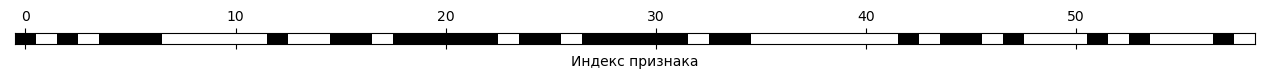

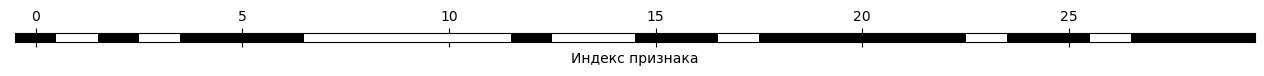

In [191]:
mask = select_pct.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");

mask = select_pct.get_support()[:30]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.xlabel("Индекс признака");

In [192]:
rg=Ridge()
rg.fit(X_train_selected,y_train)
mape(y_test,rg.predict(X_test_selected))

0.18268791003736853

In [194]:
cv_scores = cross_val_score(rg, X_test_selected, y_test, cv=10,scoring='neg_mean_absolute_percentage_error' )
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV Precision = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -0.2120
	-0.2213
	-0.1748
	-0.2041
	-0.1859
	-0.2411
	-0.2057
	-0.2323
	-0.1752
	-0.2916
Mean CV Precision = 0.2144


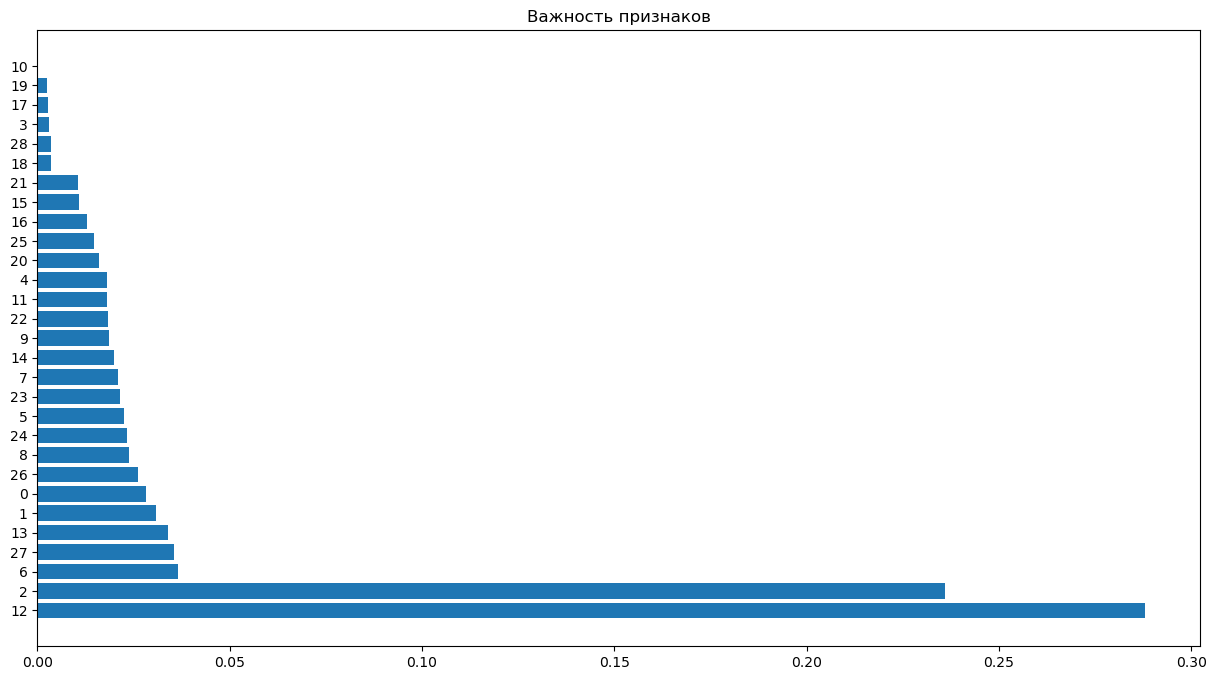

In [197]:
X_train, X_test,y_train, y_test = train_test_split(train.drop(['price'],axis=1), train.price,train_size=0.7)
rfc = RandomForestRegressor()
rfc.fit(X_train,y_train)

plt.figure(figsize=(15,8))
feature_names = np.array(X_train.columns)
importance = rfc.feature_importances_

importance = np.sort(rfc.feature_importances_)
importance_name = np.argsort(rfc.feature_importances_)

plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

,mean,std
13,0.033924,0.026461
27,0.035584,0.045810
6,0.036567,0.036658
2,0.235879,0.152613
12,0.287847,0.176079


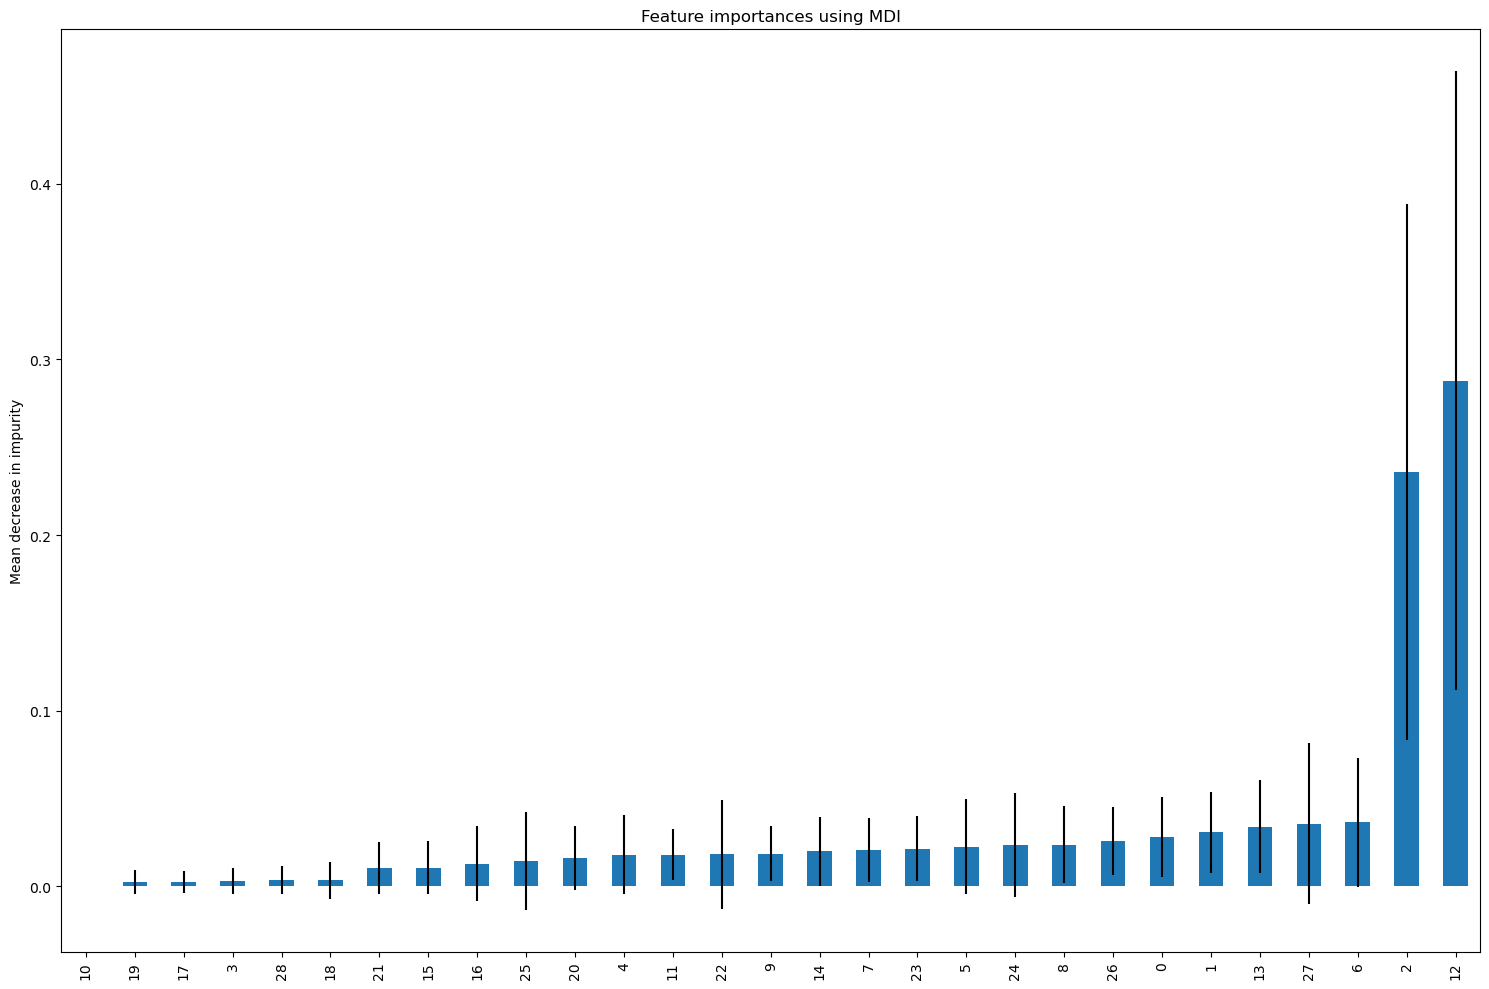

In [198]:
forest_importances = pd.DataFrame(rfc.feature_importances_, index=feature_names, columns =['mean'])
forest_importances['std'] = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

sort_forest = forest_importances.sort_values(by='mean')


fig, ax = plt.subplots(figsize=(15,10))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

display(sort_forest.tail(5))

invalid value encountered in true_divide
invalid value encountered in true_divide


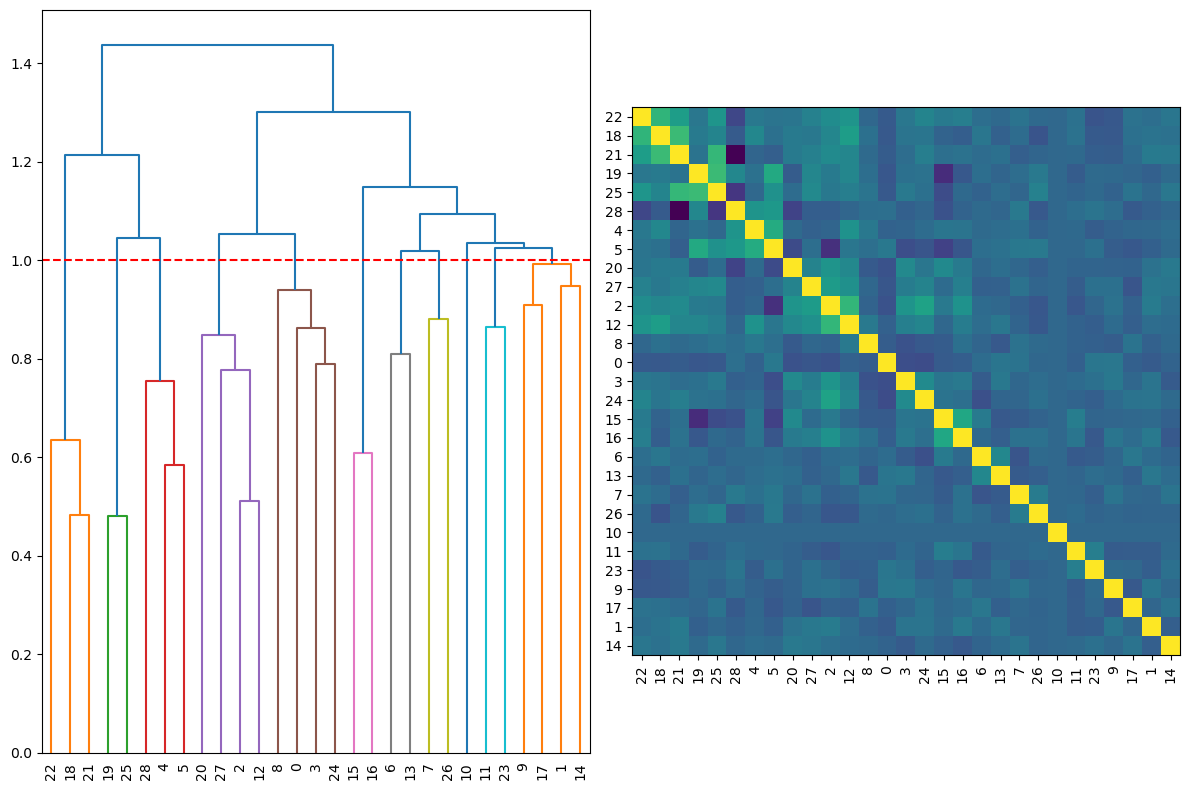

In [199]:
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation
corr = np.nan_to_num(corr)

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1-np.abs(corr)
feature_names=np.array(X_train.columns)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = feature_names,
    ax=ax1, leaf_rotation=90
 )
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax1.axhline(y=1, color='r', linestyle='--')

# distance_matrix = 1 - np.abs(corr)
# dist_linkage = hierarchy.ward(squareform(distance_matrix))
# dendro = hierarchy.dendrogram(
#     dist_linkage, 
#     ax=ax2, leaf_rotation=90
# )

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(feature_names[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(feature_names[dendro["leaves"]])
fig.tight_layout()
plt.show()

Точность тестовых данных с удаленными признаками: 0.34
[0, 1, 2, 4, 6, 7, 10, 11, 15, 18, 19]
['0' '1' '2' '4' '6' '7' '10' '11' '15' '18' '19']


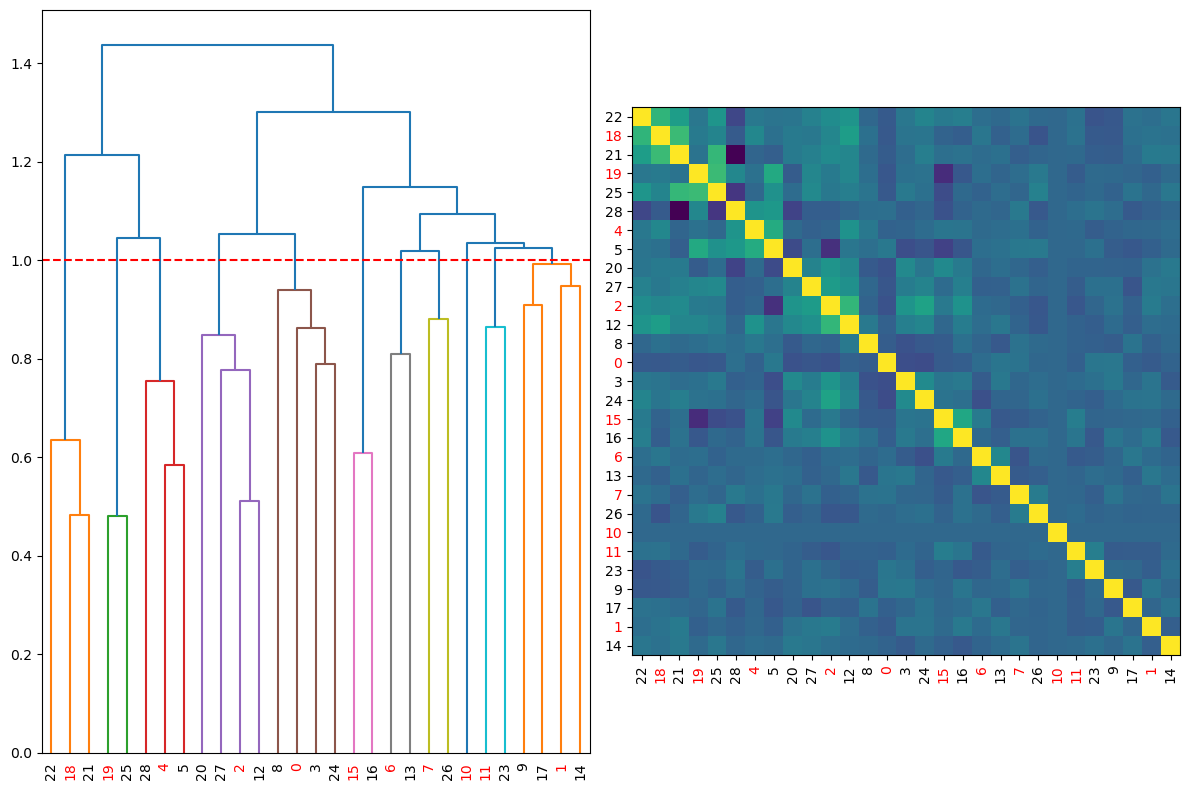

In [200]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

# X_train_sel = X_train[:, selected_features]
# X_test_sel = X_test[:, selected_features]
X_train_np = X_train.values
X_test_np = X_test.values

X_train_sel = X_train_np[:, selected_features]
X_test_sel = X_test_np[:, selected_features]
clf_sel = RandomForestRegressor(n_jobs=-1)
clf_sel.fit(X_train_sel, y_train)
print(
    "Точность тестовых данных с удаленными признаками: {:.2f}".format(
        clf_sel.score(X_test_sel, y_test)
    )
)
y_pred_train = clf_sel.predict(X_train_sel)
y_pred = clf_sel.predict(X_test_sel)



selected_features_names = feature_names[selected_features]


print(selected_features)
print(selected_features_names)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = feature_names,
    ax=ax1, leaf_rotation=90
)

ax1.axhline(y=1, color='r', linestyle='--')

[ax1.get_xticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(feature_names[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(feature_names[dendro["leaves"]])
fig.tight_layout()
[ax2.get_xticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];
[ax2.get_yticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];
plt.show()

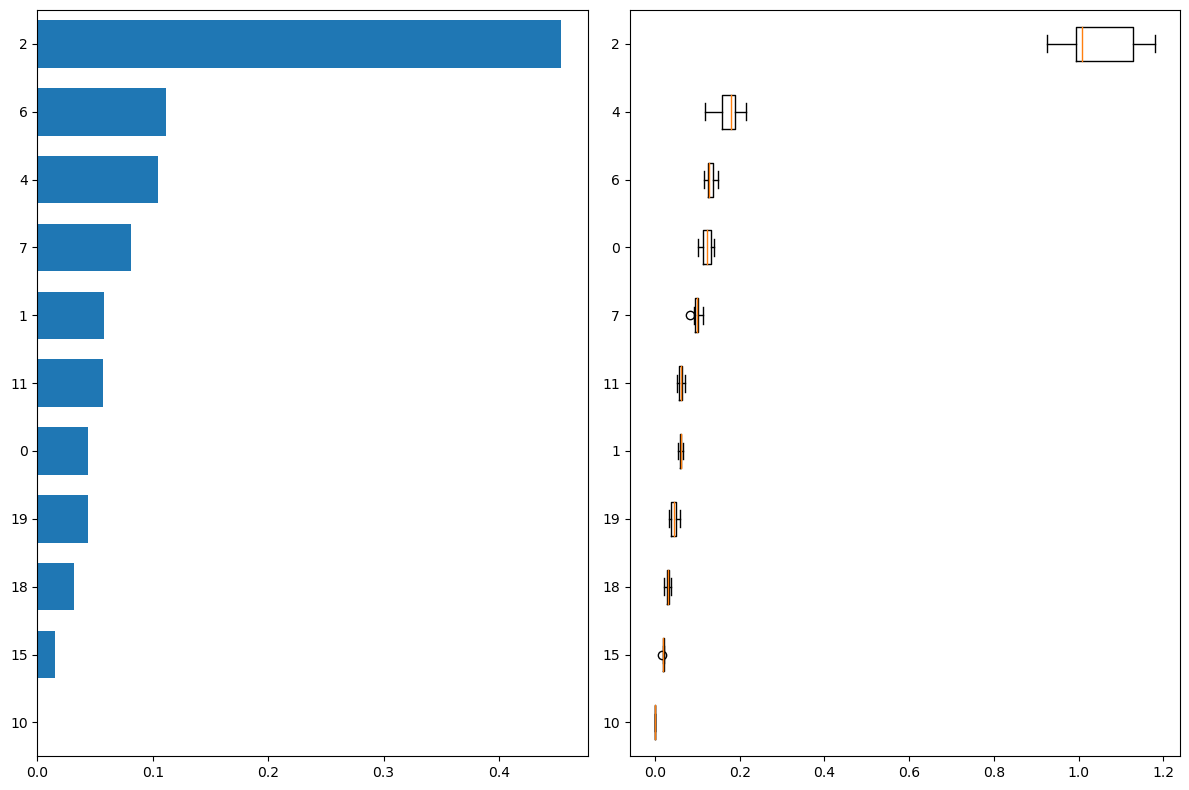

In [201]:
result = permutation_importance(clf_sel, X_train_sel, y_train, n_repeats=10, random_state=42)

perm_sorted_idx = result.importances_mean.argsort()
tree_importance_sorted_idx = np.argsort(clf_sel.feature_importances_)
tree_indices = np.arange(0, len(clf_sel.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.barh(tree_indices, clf_sel.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(selected_features_names[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf_sel.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=selected_features_names[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

,mean,std
10,0.000000,0.000000
15,0.015047,0.013685
18,0.031961,0.034379
19,0.043711,0.049028
0,0.043920,0.018528
11,0.057156,0.031066
1,0.057629,0.024016
7,0.081330,0.039226
4,0.104097,0.056090
6,0.111167,0.051466


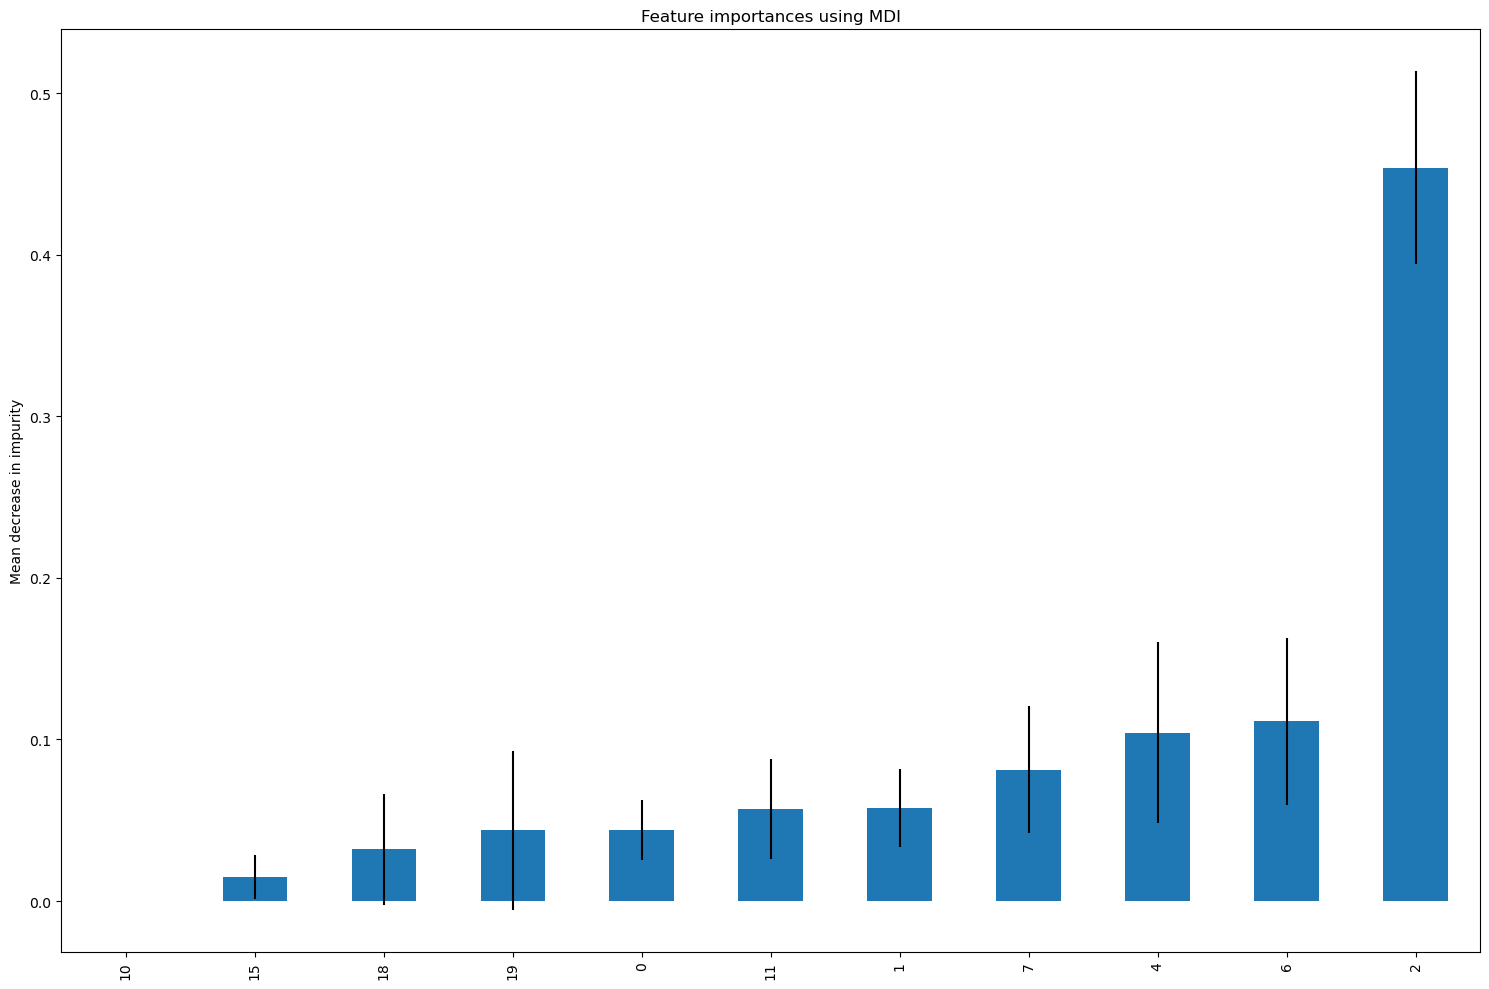

In [202]:
feature_names = selected_features_names[tree_importance_sorted_idx]
forest_importances = pd.DataFrame(clf_sel.feature_importances_, 
                                  index=selected_features_names, 
                                  columns =['mean'])
forest_importances['std'] = np.std([tree.feature_importances_ for tree in clf_sel.estimators_], axis=0)

sort_forest = forest_importances.sort_values(by='mean')


fig, ax = plt.subplots(figsize=(15,10))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

display(sort_forest)

In [127]:
X_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28'],
      dtype='object')

In [207]:

rf=RandomForestRegressor(n_jobs=-1)
rf.fit(X_train[['0','1','2','4','6','7','11','15','18','19']],y_train)
mape(y_test,rf.predict(X_test[['0','1','2','4','6','7','11','15','18','19']]))

0.24258552138193365

C:\Users\Stepan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Оптимально : 28


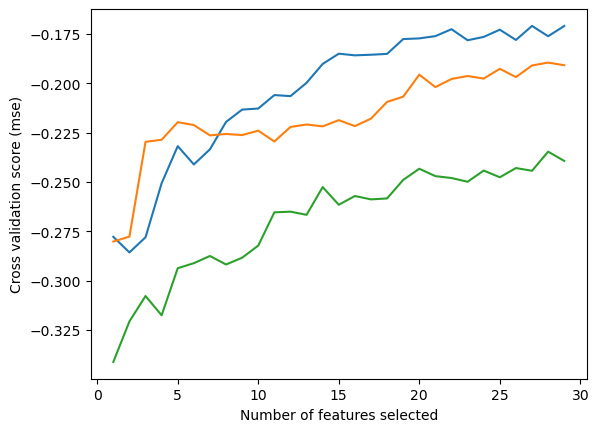

In [130]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 5 informative features

# Create the RFE object and compute a cross-validated score.
rf=RandomForestRegressor(n_jobs=-1)# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=StratifiedKFold(3),
    scoring="neg_mean_absolute_percentage_error",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Оптимально : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mse)")
filtered = pd.DataFrame(rfecv.cv_results_).filter(regex='split') #[s for s in rfecv.cv_results_.keys() if 'split' in s]
plt.plot(
    range(min_features_to_select, len(filtered) + min_features_to_select),
    filtered
)
plt.show()

In [138]:
import shap
rf.fit(X_train,y_train)
explainer = shap.explainers.Tree(rf, X_train)
shap_values = explainer.shap_values(X_train)

feature_names = np.array(train.drop('price',axis=1).columns)

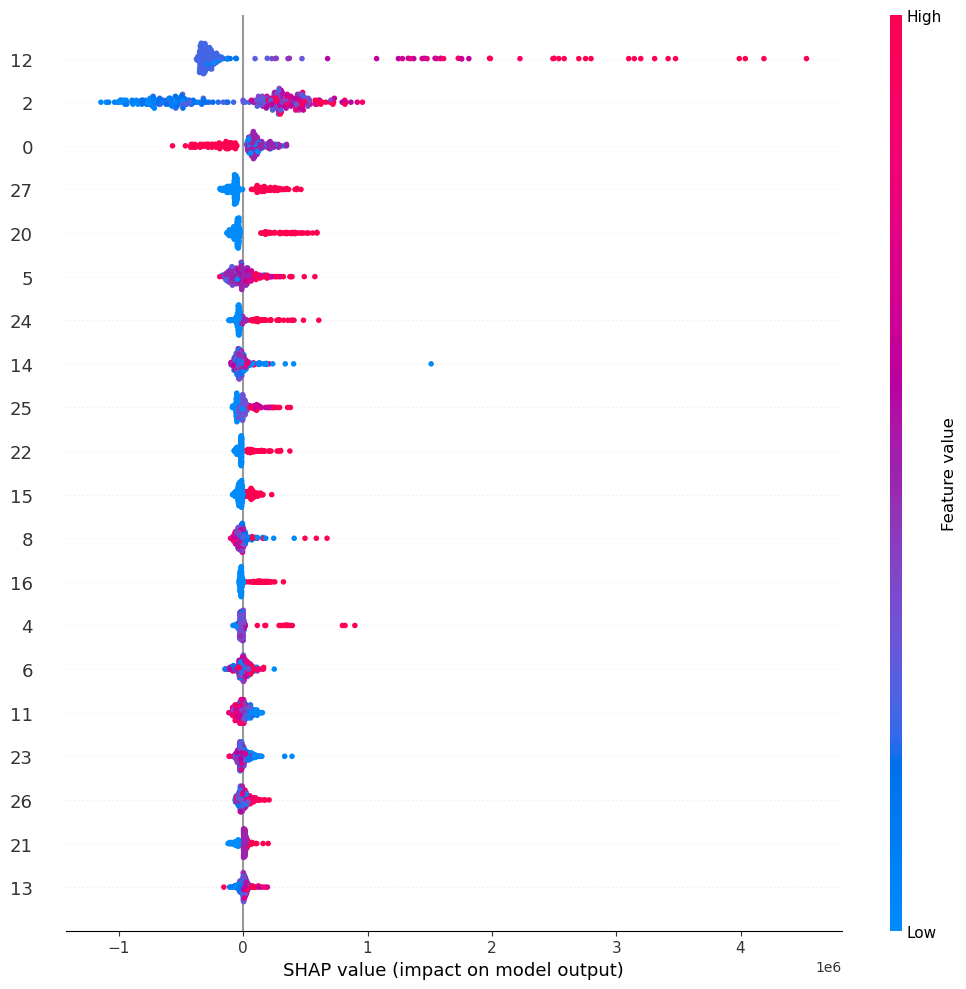

In [139]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
shap.summary_plot(shap_values = shap_values, 
                  features = X_train,
                  feature_names=feature_names, 
                  plot_size=None, show=False) # это нужно только для отрисовки графиков рядом в subplot
#plt.subplot(1,2,2)
#shap.summary_plot(shap_values[1], X_train, feature_names=feature_names, plot_size=None, show=False)

In [140]:
method_train = explainer(X_train)
explanation_train = shap.Explanation(values = method_train.values, 
                  base_values =  method_train.base_values, 
                  data = X_train.values, 
                  feature_names = feature_names)
def shapley_feature_ranking(explanation,func = np.mean):
    '''
    func по умолчанию np.mean, но можно заменить например на np.max
    '''
    feature_order = np.argsort(func(np.abs(explanation.values), axis=0))
    
    return pd.DataFrame(
        {
            "features": [explanation.feature_names[i] for i in feature_order][::-1],
            "importance": [
                func(np.abs(explanation.values), axis=0)[i] for i in feature_order
            ][::-1],
        }
    )

important_feature = shapley_feature_ranking(explanation_train)
display(important_feature.head(6))

,features,importance
0,12,559427.917520
1,2,472410.595916
2,0,152844.441139
3,27,117860.127134
4,20,107686.836602
5,5,76599.300054


In [224]:
rf.fit(X_train[['12','2','27','0','20','5']],y_train)
mape(y_test,rf.predict(X_test[['12','2','27','0','20','5']]))


0.20282331207222873

In [225]:
cv_scores = cross_val_score(rf, X_test[['12','2','27','0','20','5']], y_test, cv=10,scoring= 'neg_mean_absolute_percentage_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV Precision = %.4f" % np.mean(cv_scores))

Cross validation scores:
	 -0.2023
	-0.1221
	-0.1657
	-0.1645
	-0.2826
	-0.1776
	-0.2387
	-0.2462
	-0.2547
	-0.1284
Mean CV Precision = -0.1983


In [143]:
#GRIDSEARCH RF
n_estimators = [100,300,500,700]
max_features = ['auto', 'sqrt']
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
rf=RandomForestRegressor(n_estimators=500)
params = [{#'n_estimators': n_estimators,
               'max_features': max_features,
               #'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}]
grid = GridSearchCV(rf, params, cv = 5, return_train_score = True, n_jobs = -1,scoring="neg_mean_absolute_percentage_error")
grid.fit(X_train, y_train)
drop = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params']

rename = {'param_preprocessing': 'preprocessing'}

results_bayes = pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score', 'std_test_score'])

display(results_bayes.drop(columns = drop).rename(columns = rename).T)
grid.best_params_

,31,27,30,32,28,29,9,35,34,33,...,16,25,24,26,23,20,18,19,22,21
param_bootstrap,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
param_max_features,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,...,sqrt,auto,auto,auto,auto,auto,auto,auto,auto,auto
param_min_samples_leaf,2,1,2,2,1,1,1,4,4,4,...,4,4,4,4,2,1,1,1,2,2
param_min_samples_split,5,2,2,10,5,10,2,10,5,2,...,5,5,2,10,10,10,2,5,5,2
split0_test_score,-0.210779,-0.210926,-0.212879,-0.213303,-0.211026,-0.208999,-0.209258,-0.211201,-0.215111,-0.215235,...,-0.22468,-0.267069,-0.267129,-0.260838,-0.24507,-0.253405,-0.252571,-0.257848,-0.238566,-0.236691
split1_test_score,-0.223929,-0.217308,-0.221873,-0.226975,-0.224711,-0.22566,-0.2297,-0.231663,-0.22916,-0.229931,...,-0.240001,-0.291603,-0.292037,-0.297856,-0.316714,-0.32437,-0.33172,-0.334005,-0.338011,-0.341037
split2_test_score,-0.199603,-0.198717,-0.198002,-0.1999,-0.201322,-0.201299,-0.200385,-0.198065,-0.199296,-0.201579,...,-0.202815,-0.256769,-0.256766,-0.259696,-0.244969,-0.257681,-0.268378,-0.269904,-0.255864,-0.260067
split3_test_score,-0.155838,-0.158661,-0.159683,-0.156681,-0.158766,-0.15847,-0.154759,-0.157488,-0.157311,-0.156706,...,-0.152013,-0.218041,-0.21797,-0.212071,-0.247336,-0.225017,-0.231307,-0.23087,-0.263586,-0.262107
split4_test_score,-0.181483,-0.186951,-0.183536,-0.183589,-0.185105,-0.187163,-0.188782,-0.184774,-0.185801,-0.183796,...,-0.200865,-0.216787,-0.216864,-0.228655,-0.231502,-0.236372,-0.242543,-0.240926,-0.243191,-0.244334
mean_test_score,-0.194327,-0.194513,-0.195195,-0.19609,-0.196186,-0.196318,-0.196577,-0.196638,-0.197336,-0.19745,...,-0.204075,-0.250054,-0.250153,-0.251823,-0.257118,-0.259369,-0.265304,-0.266711,-0.267844,-0.268847


{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [209]:
rf=RandomForestRegressor(bootstrap=False,max_features='sqrt',min_samples_leaf=2,min_samples_split=5)
rf.fit(X_train[['12','2','27','0','20','5']],y_train)
mape(y_test,rf.predict(X_test[['12','2','27','0','20','5']]))


0.20671714665021076

In [150]:
alpha=[0.001,0.01,0.1]+list(range(1,30))
preprocessor=[StandardScaler(),MinMaxScaler(),RobustScaler()]

param_grid =[
    { 'preprocessor':preprocessor,
        'regression': [Ridge()],
     'regression__alpha': alpha
     }
]
regression_pipeline = Pipeline(steps=[
    ("preprocessor", StandardScaler()), 
    ("regression", Ridge())])
grid = GridSearchCV(regression_pipeline, param_grid, cv=5, return_train_score=True,scoring="neg_mean_absolute_percentage_error")
grid.fit(X_train,y_train)
drop = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params']

rename = {'param_preprocessing': 'preprocessing'}

results_bayes = pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score', 'std_test_score'])

display(results_bayes.drop(columns = drop).rename(columns = rename).T)
grid.best_params_

,31,30,29,28,27,26,25,24,23,22,...,54,55,56,57,58,59,60,61,62,63
param_preprocessor,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler()
param_regression,Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),...,Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29),Ridge(alpha=29)
param_regression__alpha,29,28,27,26,25,24,23,22,21,20,...,20,21,22,23,24,25,26,27,28,29
split0_test_score,-0.183712,-0.183571,-0.183429,-0.183287,-0.183145,-0.183003,-0.182861,-0.182719,-0.182577,-0.182435,...,-0.232358,-0.234272,-0.236145,-0.23795,-0.239725,-0.241473,-0.243162,-0.244798,-0.246382,-0.247918
split1_test_score,-0.207239,-0.207191,-0.207142,-0.207091,-0.207039,-0.206986,-0.206932,-0.206876,-0.206819,-0.20676,...,-0.231428,-0.232587,-0.233705,-0.234784,-0.235855,-0.237127,-0.2386,-0.24003,-0.241419,-0.24277
split2_test_score,-0.188624,-0.188839,-0.189057,-0.189277,-0.189499,-0.189724,-0.189951,-0.19018,-0.190413,-0.190648,...,-0.193909,-0.195111,-0.196259,-0.197433,-0.198583,-0.199686,-0.200745,-0.201762,-0.202741,-0.203684
split3_test_score,-0.160965,-0.161158,-0.161353,-0.16155,-0.161749,-0.161951,-0.162155,-0.162361,-0.16257,-0.162781,...,-0.183928,-0.185085,-0.186275,-0.187483,-0.18864,-0.18975,-0.190816,-0.191841,-0.192827,-0.193778
split4_test_score,-0.160286,-0.160198,-0.160111,-0.160024,-0.159936,-0.159849,-0.159761,-0.159673,-0.159584,-0.159495,...,-0.193558,-0.19512,-0.196789,-0.198442,-0.200071,-0.201743,-0.203377,-0.204959,-0.206492,-0.207979
mean_test_score,-0.180165,-0.180191,-0.180218,-0.180246,-0.180274,-0.180302,-0.180332,-0.180362,-0.180393,-0.180424,...,-0.207036,-0.208435,-0.209834,-0.211218,-0.212575,-0.213956,-0.21534,-0.216678,-0.217972,-0.219226
std_test_score,0.017782,0.017761,0.01774,0.01772,0.0177,0.017682,0.017664,0.017647,0.01763,0.017615,...,0.020611,0.020741,0.02084,0.020912,0.020996,0.021132,0.02132,0.021507,0.021693,0.021878


{'preprocessor': StandardScaler(),
 'regression': Ridge(alpha=29),
 'regression__alpha': 29}

In [222]:
regression_pipeline = Pipeline(steps=[
    ("preprocessor", StandardScaler()), 
    ("regression", Ridge(alpha=29))])
regression_pipeline.fit(X_train,y_train)
mape(y_test,regression_pipeline.predict(X_test))


0.17723195428491897

In [223]:
cv_scores = cross_val_score(regression_pipeline, X_test[['22','2','27','20','25','25']], y_test, cv=10,scoring= 'neg_mean_absolute_percentage_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV Precision = %.4f" % np.mean(cv_scores))

Cross validation scores:
	 -0.2186
	-0.0864
	-0.1654
	-0.1568
	-0.2358
	-0.1638
	-0.2458
	-0.2227
	-0.2583
	-0.1629
Mean CV Precision = -0.1916


In [210]:
import shap
rg=Ridge(alpha=29)
rg.fit(X_train,y_train)
explainer = shap.LinearExplainer(rg, X_train)
shap_values = explainer.shap_values(X_train)

feature_names = X_train.columns

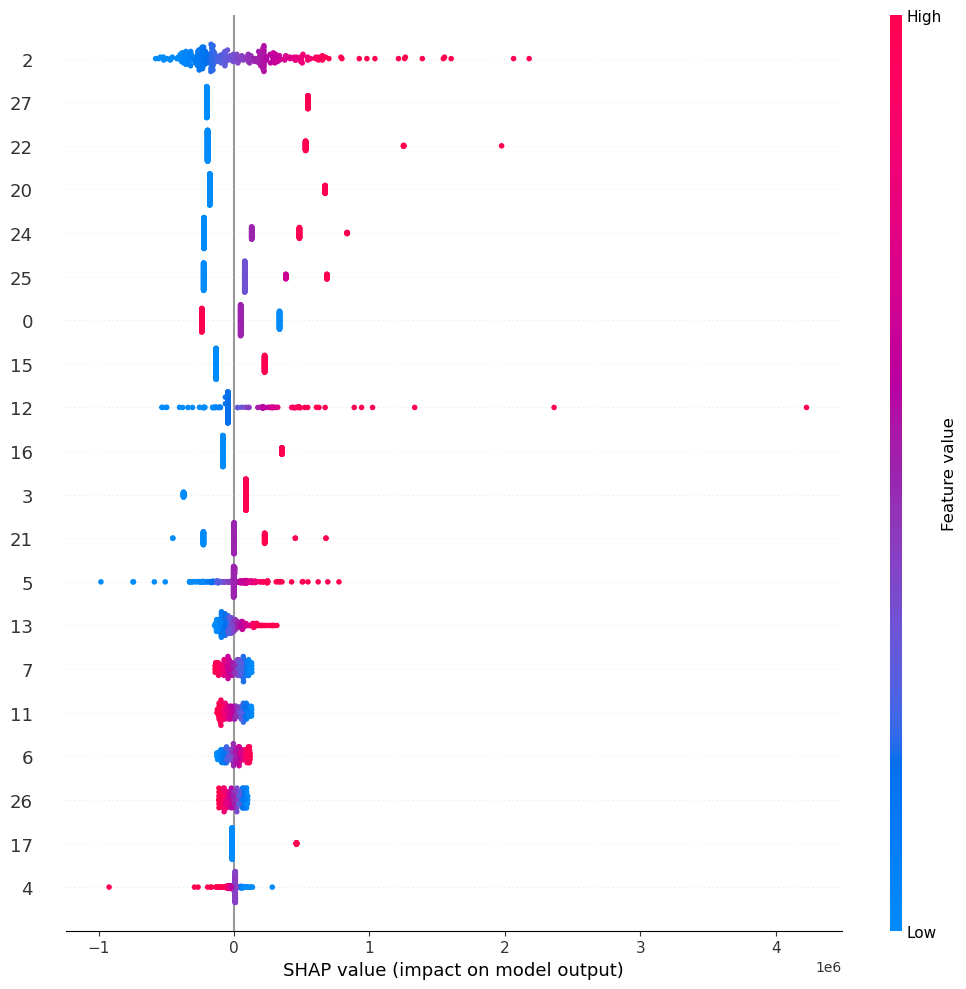

In [211]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
shap.summary_plot(shap_values = shap_values, 
                  features = X_train,
                  feature_names=feature_names, 
                  plot_size=None, show=False) # это нужно только для отрисовки графиков рядом в subplot
#plt.subplot(1,2,2)
#shap.summary_plot(shap_values[1], X_train, feature_names=feature_names, plot_size=None, show=False)

In [212]:
method_train = explainer(X_train)
explanation_train = shap.Explanation(values = method_train.values, 
                  base_values =  method_train.base_values, 
                  data = X_train.values, 
                  feature_names = feature_names)
def shapley_feature_ranking(explanation,func = np.mean):
    '''
    func по умолчанию np.mean, но можно заменить например на np.max
    '''
    feature_order = np.argsort(func(np.abs(explanation.values), axis=0))
    
    return pd.DataFrame(
        {
            "features": [explanation.feature_names[i] for i in feature_order][::-1],
            "importance": [
                func(np.abs(explanation.values), axis=0)[i] for i in feature_order
            ][::-1],
        }
    )

important_feature = shapley_feature_ranking(explanation_train)
display(important_feature.head(6))

,features,importance
0,2,307690.832448
1,27,304047.281721
2,22,303507.257802
3,20,279355.261348
4,24,267978.161114
5,25,203684.835354


In [217]:
regression_pipeline = Pipeline(steps=[
    ("preprocessor", StandardScaler()), 
    ("regression", Ridge(alpha=29))])
regression_pipeline.fit(X_train[['22','2','27','20','25','25']],y_train)
mape(y_test,regression_pipeline.predict(X_test[['22','2','27','20','25','25']]))


0.18732219123400506

In [219]:
cv_scores = cross_val_score(regression_pipeline, X_test[['22','2','27','20','25','25']], y_test, cv=10,scoring= 'neg_mean_absolute_percentage_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV Precision = %.4f" % np.mean(cv_scores))

Cross validation scores:
	 -0.2186
	-0.0864
	-0.1654
	-0.1568
	-0.2358
	-0.1638
	-0.2458
	-0.2227
	-0.2583
	-0.1629
Mean CV Precision = -0.1916


In [214]:
alpha=[0.001,0.01,0.1]+list(range(1,30))
preprocessor=[StandardScaler(),MinMaxScaler(),RobustScaler()]

param_grid =[
    { 'preprocessor':preprocessor,
        'regression': [Ridge()],
     'regression__alpha': alpha
     }
]
regression_pipeline = Pipeline(steps=[
    ("preprocessor", StandardScaler()), 
    ("regression", Ridge())])
grid = GridSearchCV(regression_pipeline, param_grid, cv=5, return_train_score=True,scoring="neg_mean_absolute_percentage_error")
grid.fit(X_train[['22','2','27','20','25','25']],y_train)
drop = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params']

rename = {'param_preprocessing': 'preprocessing'}

results_bayes = pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score', 'std_test_score'])

display(results_bayes.drop(columns = drop).rename(columns = rename).T)
grid.best_params_

,20,19,21,18,22,17,23,16,24,25,...,54,55,56,57,58,59,60,61,62,63
param_preprocessor,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler()
param_regression,Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),...,Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18),Ridge(alpha=18)
param_regression__alpha,18,17,19,16,20,15,21,14,22,23,...,20,21,22,23,24,25,26,27,28,29
split0_test_score,-0.22435,-0.224171,-0.224528,-0.223991,-0.224705,-0.22381,-0.224881,-0.223629,-0.225057,-0.225231,...,-0.288174,-0.289842,-0.291432,-0.29295,-0.294402,-0.295792,-0.297126,-0.298407,-0.29964,-0.300826
split1_test_score,-0.164684,-0.164738,-0.164629,-0.164792,-0.164575,-0.164865,-0.164522,-0.164982,-0.164468,-0.164414,...,-0.20026,-0.20153,-0.202734,-0.203878,-0.204967,-0.206005,-0.206997,-0.207945,-0.208854,-0.209726
split2_test_score,-0.224506,-0.224476,-0.224537,-0.224446,-0.224569,-0.224416,-0.2246,-0.224387,-0.224632,-0.224665,...,-0.260541,-0.262085,-0.263676,-0.265362,-0.267016,-0.268666,-0.270261,-0.271805,-0.2733,-0.27475
split3_test_score,-0.170544,-0.170824,-0.170313,-0.171106,-0.170096,-0.17139,-0.16988,-0.171675,-0.169665,-0.169451,...,-0.184114,-0.185448,-0.186746,-0.187981,-0.189158,-0.190281,-0.191354,-0.192382,-0.193367,-0.194396
split4_test_score,-0.210481,-0.210375,-0.210587,-0.210268,-0.210692,-0.210161,-0.210809,-0.210053,-0.210929,-0.211048,...,-0.248173,-0.24958,-0.250934,-0.252231,-0.253475,-0.25467,-0.25582,-0.256927,-0.257994,-0.259024
mean_test_score,-0.198913,-0.198917,-0.198919,-0.198921,-0.198927,-0.198928,-0.198938,-0.198945,-0.19895,-0.198962,...,-0.236252,-0.237697,-0.239105,-0.24048,-0.241803,-0.243083,-0.244312,-0.245493,-0.246631,-0.247745
std_test_score,0.026124,0.025999,0.026239,0.025874,0.02635,0.025743,0.026463,0.025601,0.026575,0.026688,...,0.038579,0.038712,0.038849,0.039003,0.039159,0.039319,0.039477,0.039632,0.039785,0.039914


{'preprocessor': StandardScaler(),
 'regression': Ridge(alpha=18),
 'regression__alpha': 18}

In [220]:
regression_pipeline = Pipeline(steps=[
    ("preprocessor", StandardScaler()), 
    ("regression", Ridge(alpha=18))])
regression_pipeline.fit(X_train[['22','2','27','20','25','25']],y_train)
mape(y_test,regression_pipeline.predict(X_test[['22','2','27','20','25','25']]))


0.18718627827079873

In [221]:
cv_scores = cross_val_score(regression_pipeline, X_test[['22','2','27','20','25','25']], y_test, cv=10,scoring= 'neg_mean_absolute_percentage_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV Precision = %.4f" % np.mean(cv_scores))

Cross validation scores:
	 -0.2172
	-0.0897
	-0.1639
	-0.1593
	-0.2350
	-0.1640
	-0.2414
	-0.2174
	-0.2483
	-0.1633
Mean CV Precision = -0.1899


invalid value encountered in true_divide
invalid value encountered in true_divide


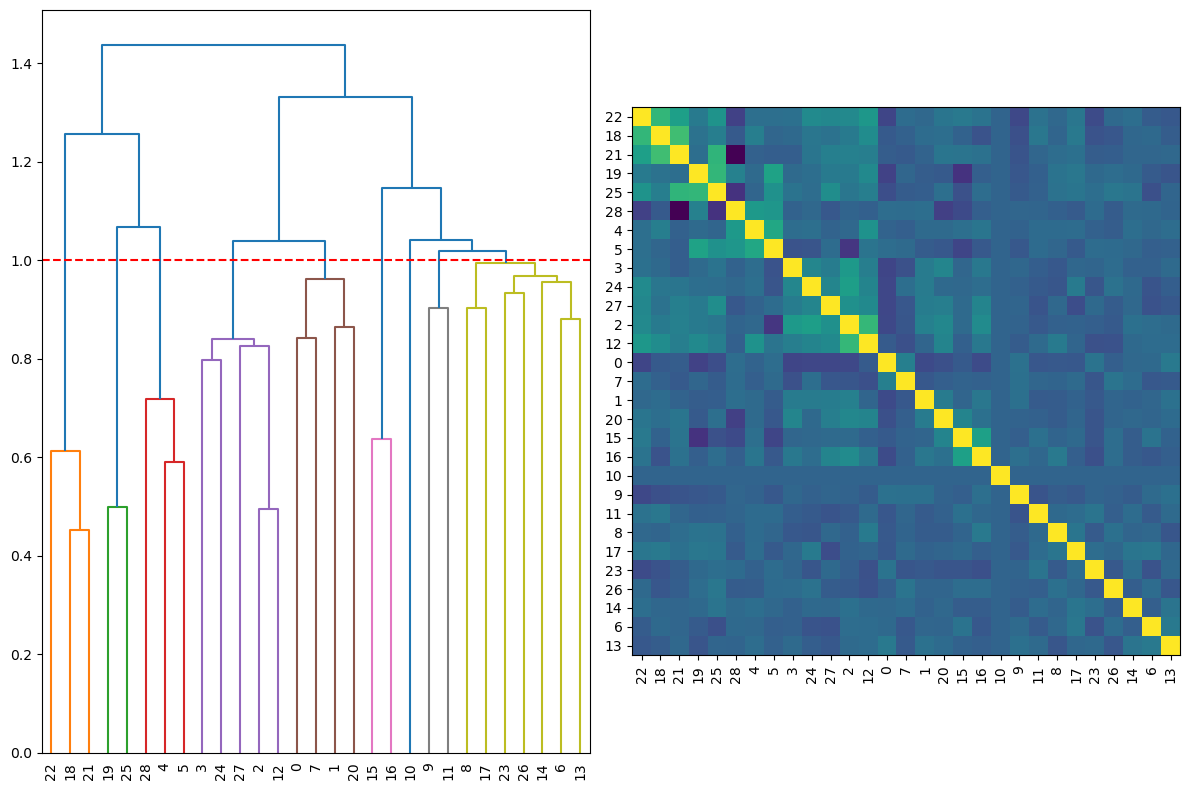

In [161]:
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation
corr = np.nan_to_num(corr)

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1-np.abs(corr)
feature_names=np.array(X_train.columns)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = feature_names,
    ax=ax1, leaf_rotation=90
 )
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax1.axhline(y=1, color='r', linestyle='--')

# distance_matrix = 1 - np.abs(corr)
# dist_linkage = hierarchy.ward(squareform(distance_matrix))
# dendro = hierarchy.dendrogram(
#     dist_linkage, 
#     ax=ax2, leaf_rotation=90
# )

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(feature_names[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(feature_names[dendro["leaves"]])
fig.tight_layout()
plt.show()

Точность тестовых данных с удаленными признаками: 0.42
[0, 2, 4, 6, 9, 10, 15, 18, 19]
['0' '2' '4' '6' '9' '10' '15' '18' '19']


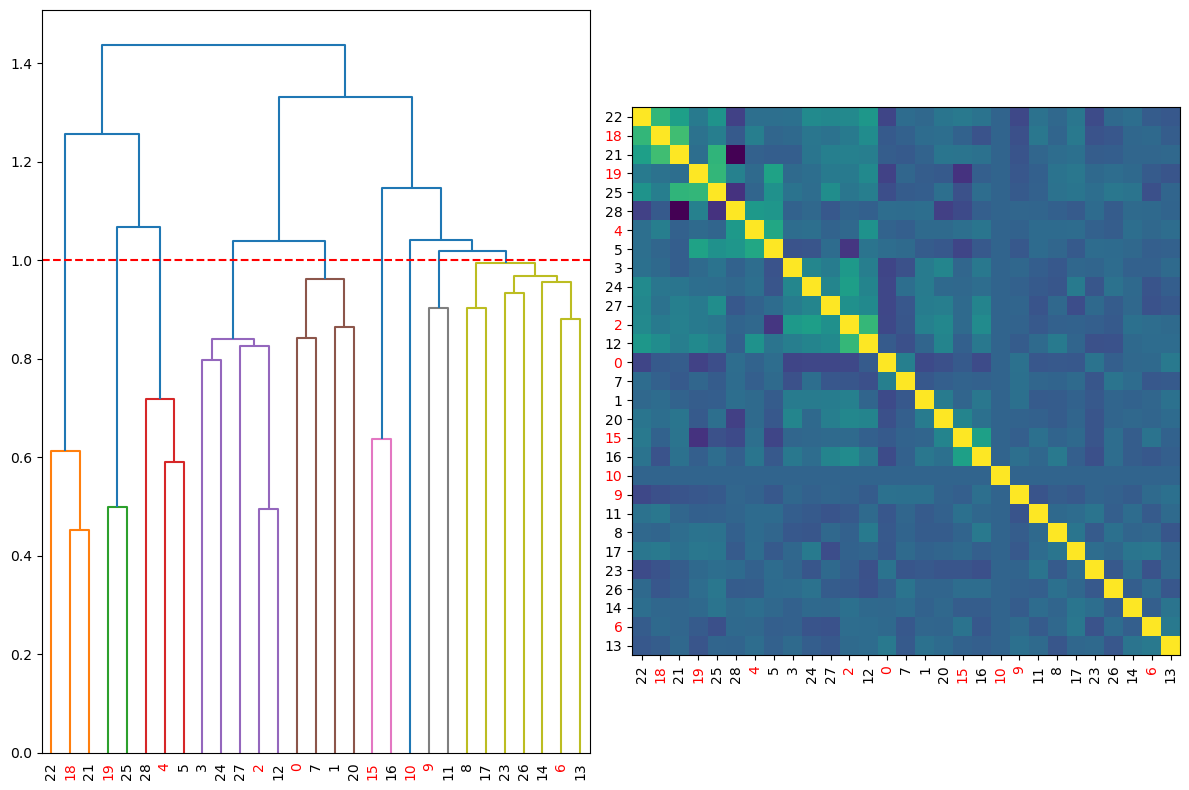

In [162]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

# X_train_sel = X_train[:, selected_features]
# X_test_sel = X_test[:, selected_features]
X_train_np = X_train.values
X_test_np = X_test.values

X_train_sel = X_train_np[:, selected_features]
X_test_sel = X_test_np[:, selected_features]
clf_sel = Ridge(29)
clf_sel.fit(X_train_sel, y_train)
print(
    "Точность тестовых данных с удаленными признаками: {:.2f}".format(
        clf_sel.score(X_test_sel, y_test)
    )
)
y_pred_train = clf_sel.predict(X_train_sel)
y_pred = clf_sel.predict(X_test_sel)



selected_features_names = feature_names[selected_features]


print(selected_features)
print(selected_features_names)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = feature_names,
    ax=ax1, leaf_rotation=90
)

ax1.axhline(y=1, color='r', linestyle='--')

[ax1.get_xticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(feature_names[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(feature_names[dendro["leaves"]])
fig.tight_layout()
[ax2.get_xticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];
[ax2.get_yticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];
plt.show()

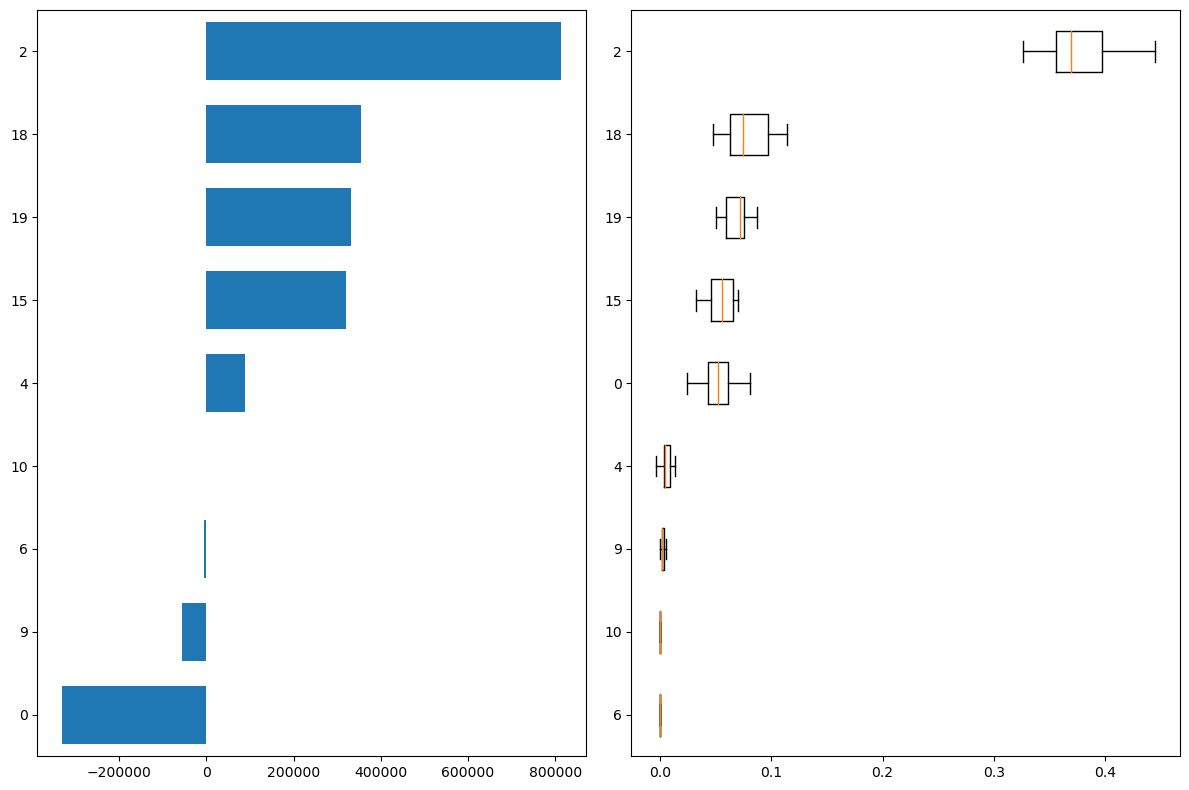

In [172]:
result = permutation_importance(clf_sel, X_train_sel, y_train, n_repeats=10, random_state=42)

perm_sorted_idx = result.importances_mean.argsort()
tree_importance_sorted_idx = np.argsort(clf_sel.coef_)
tree_indices = np.arange(0, len(clf_sel.coef_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.barh(tree_indices, clf_sel.coef_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(selected_features_names[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf_sel.coef_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=selected_features_names[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

In [181]:
feature_names = selected_features_names[tree_importance_sorted_idx]
forest_importances = pd.DataFrame(clf_sel.coef_, 
                                  index=selected_features_names, 
                                  columns =['mean'])
forest_importances['std'] = np.std([tree.feature_importances_ for tree in clf_sel.estimators_], axis=0)

sort_forest = forest_importances.sort_values(by='mean')


fig, ax = plt.subplots(figsize=(15,10))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

display(sort_forest)

AttributeError: 'Ridge' object has no attribute 'estimators_'

In [182]:
regression_pipeline = Pipeline(steps=[
    ("preprocessor", StandardScaler()), 
    ("regression", Ridge(alpha=29))])
regression_pipeline.fit(X_train[['0','2','4','6','9','15','18','19']],y_train)
mape(y_test,regression_pipeline.predict(X_test[['0','2','4','6','9','15','18','19']]))


0.20748593010275934